# Extracción de Características de México

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import funpymodeling.exploratory as fp

In [165]:
df = pd.read_csv('listings - CDMX_clean.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,id,host_id,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,44616,196253,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,No neighborhood_overview,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,...,0.0,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.41
1,67703,334451,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",No neighborhood_overview,Nicholas,2011-01-04,"Mexico City, Mexico","I am a journalist writing about food, (book an...",...,4.0,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.31
2,70644,212109,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,Trisha,2010-08-24,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",...,7.0,2.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,0.83
3,107078,540705,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",Andrea,2011-04-27,"Mexico City, Mexico",I Leave in Mexico City... I am an Architect an...,...,0.0,0.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,0.11
4,131610,647454,previous scrape,MARIA DEL ALMA,No description,No neighborhood_overview,Fernando,2011-05-31,"Mexico City, Mexico",No description,...,0.0,0.0,4.80,4.80,4.80,4.90,4.90,4.90,4.80,1.17


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26581 entries, 0 to 26580
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           26581 non-null  int64  
 1   host_id                      26581 non-null  int64  
 2   source                       26581 non-null  object 
 3   name                         26581 non-null  object 
 4   description                  26581 non-null  object 
 5   neighborhood_overview        26581 non-null  object 
 6   host_name                    26581 non-null  object 
 7   host_since                   26581 non-null  object 
 8   host_location                26581 non-null  object 
 9   host_about                   26581 non-null  object 
 10  host_response_time           26581 non-null  object 
 11  host_response_rate           26581 non-null  object 
 12  host_acceptance_rate         26581 non-null  object 
 13  host_is_superhos

### Análisis Univariado

In [167]:
# Escogemos las 12 variables categóricas disponibles en el dataset
df = df[["source", "host_response_time", "host_is_superhost", "host_verifications", "host_identity_verified", 
         "neighbourhood_cleansed", "property_type", "room_type", "bathrooms_text", "has_availability",
         "instant_bookable", "host_location"]]

In [168]:
# Realizamos el análisis univariado
fp.freq_tbl(df)

            source  frequency  percentage  cumulative_perc
0      city scrape      23670    0.890486         0.890486
1  previous scrape       2911    0.109514         1.000000

----------------------------------------------------------------

   host_response_time  frequency  percentage  cumulative_perc
0      within an hour      18792    0.706971         0.706971
1             No data       3622    0.136263         0.843234
2  within a few hours       1957    0.073624         0.916858
3  a few days or more       1107    0.041646         0.958504
4        within a day       1103    0.041496         1.000000

----------------------------------------------------------------

  host_is_superhost  frequency  percentage  cumulative_perc
0                 f      16854    0.634062         0.634062
1                 t       9727    0.365938         1.000000

----------------------------------------------------------------

                 host_verifications  frequency  percentage  cumulative

### Análisis Univariado por Variable

#### Variable "source"

In [169]:
# Realizamos el análisis univariado de la variable "source"
source = fp.freq_tbl(df["source"])
# Quitaremos las columnas "percent" y "cumulative_percent" para que la tabla sea más legible
source.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
source

,source,frequency
0,city scrape,23670
1,previous scrape,2911


In [170]:
# Ajustamos el índice (para mayor legibilidad en el gráfico)
source = source.set_index("source")
source

,frequency
source,
city scrape,23670
previous scrape,2911


Text(0, 0.5, '')

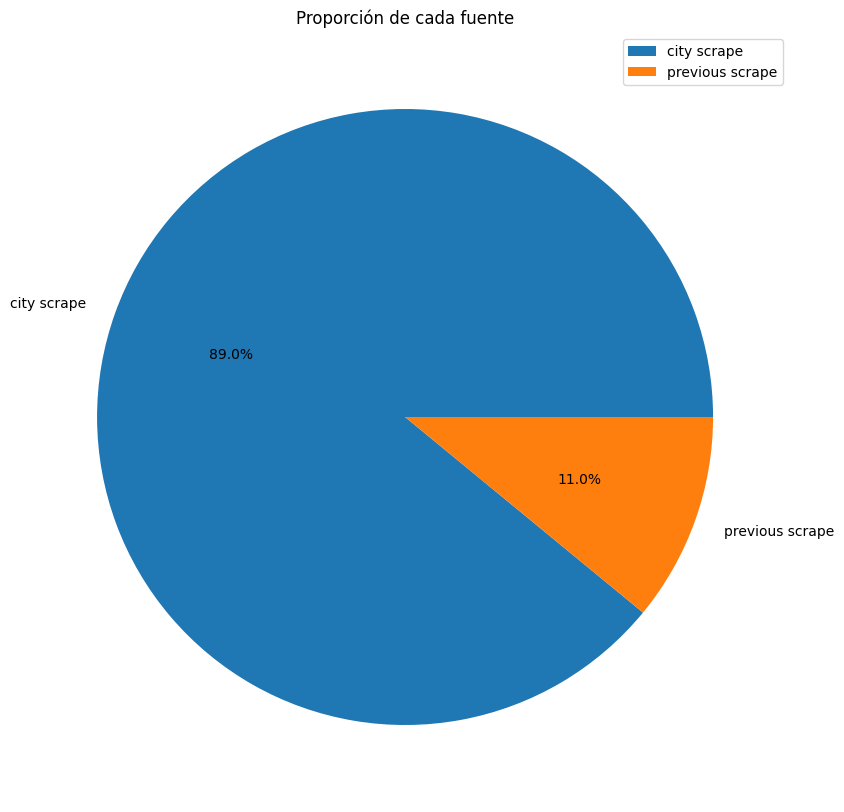

In [171]:
# Generamos un gráfico de pastel para representar la proporción de cada fuente
source.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada fuente")
plt.ylabel("")

#### Variable "host_response_time"

In [172]:
host_response_time = fp.freq_tbl(df["host_response_time"])
host_response_time.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_response_time

,host_response_time,frequency
0,within an hour,18792
1,No data,3622
2,within a few hours,1957
3,a few days or more,1107
4,within a day,1103


In [173]:
host_response_time = host_response_time.set_index("host_response_time")
host_response_time = host_response_time.drop("No data")
host_response_time

,frequency
host_response_time,
within an hour,18792
within a few hours,1957
a few days or more,1107
within a day,1103


Text(0, 0.5, 'Frecuencia')

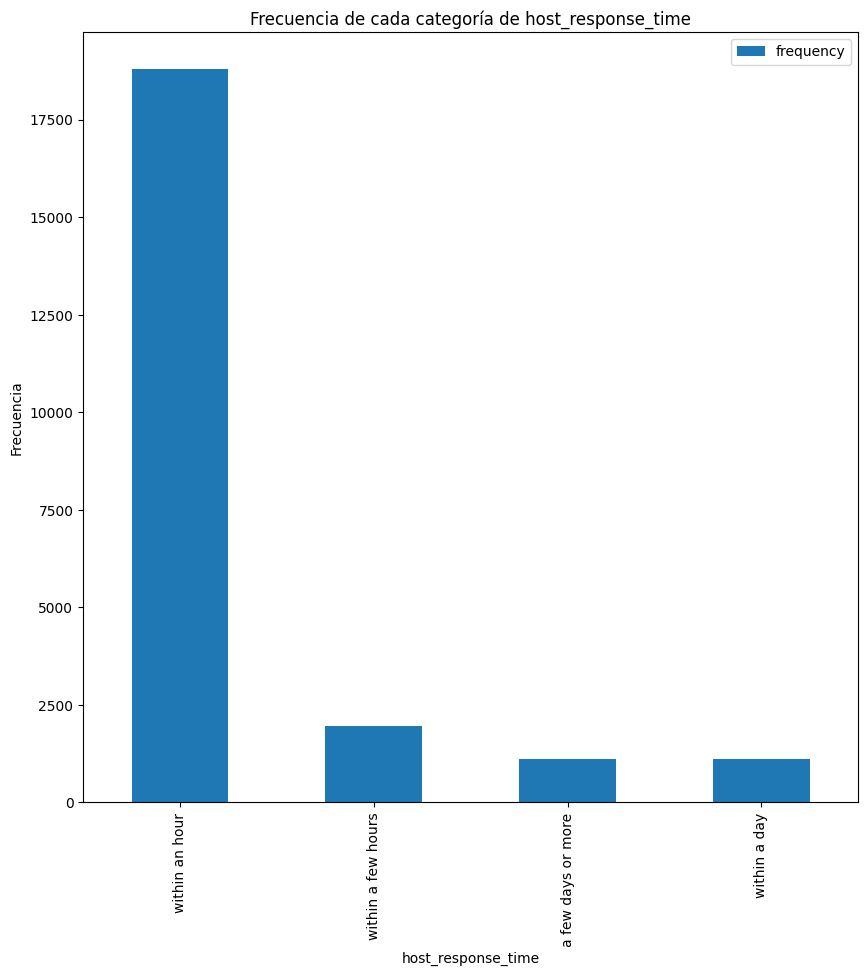

In [174]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
host_response_time.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de host_response_time")
plt.ylabel("Frecuencia")

#### Variable "host_is_superhost"

In [175]:
host_is_superhost = fp.freq_tbl(df["host_is_superhost"])
host_is_superhost.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_is_superhost

,host_is_superhost,frequency
0,f,16854
1,t,9727


In [176]:
# Ajustamos el índice
host_is_superhost = host_is_superhost.set_index("host_is_superhost")
host_is_superhost

,frequency
host_is_superhost,
f,16854
t,9727


Text(0, 0.5, '')

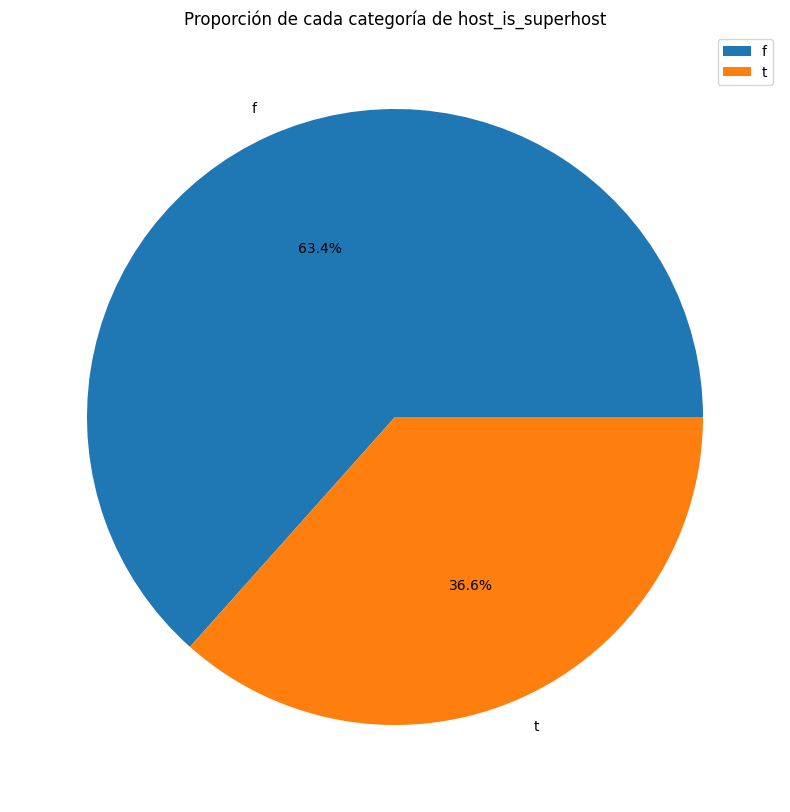

In [177]:
# Haremos un gráfico de pastel para representar la proporción de cada categoría
host_is_superhost.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de host_is_superhost")
plt.ylabel("")

#### Variable "host_identity_verified"

In [178]:
host_identity_verified = fp.freq_tbl(df["host_identity_verified"])
host_identity_verified.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_identity_verified

,host_identity_verified,frequency
0,t,25425
1,f,1156


In [179]:
host_identity_verified = host_identity_verified.set_index("host_identity_verified")
host_identity_verified

,frequency
host_identity_verified,
t,25425
f,1156


Text(0, 0.5, '')

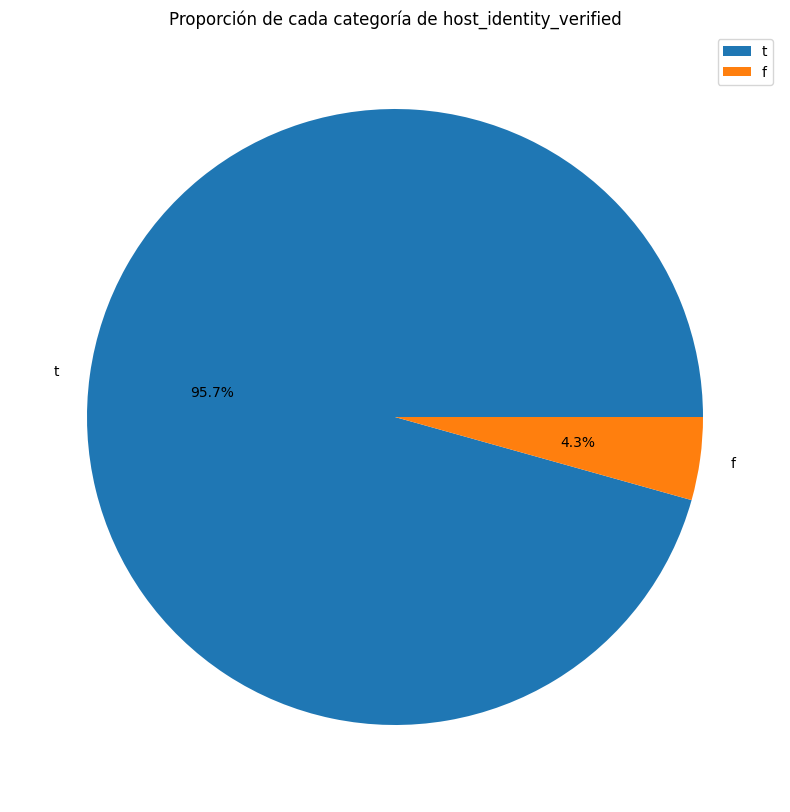

In [180]:
host_identity_verified.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de host_identity_verified")
plt.ylabel("")

#### Variable "neighbourhood_cleansed"

In [181]:
neighbourhood_cleansed = fp.freq_tbl(df["neighbourhood_cleansed"])
neighbourhood_cleansed.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
neighbourhood_cleansed

,neighbourhood_cleansed,frequency
0,Cuauhtémoc,12231
1,Miguel Hidalgo,4533
2,Benito Juárez,3152
3,Coyoacán,1719
4,Álvaro Obregón,1075
5,Tlalpan,812
6,Venustiano Carranza,734
7,Gustavo A. Madero,506
8,Cuajimalpa de Morelos,441
9,Iztacalco,399


In [182]:
# Ajustamos el índice
neighbourhood_cleansed = neighbourhood_cleansed.set_index("neighbourhood_cleansed")
neighbourhood_cleansed

,frequency
neighbourhood_cleansed,
Cuauhtémoc,12231
Miguel Hidalgo,4533
Benito Juárez,3152
Coyoacán,1719
Álvaro Obregón,1075
Tlalpan,812
Venustiano Carranza,734
Gustavo A. Madero,506
Cuajimalpa de Morelos,441


Text(0, 0.5, 'Frecuencia')

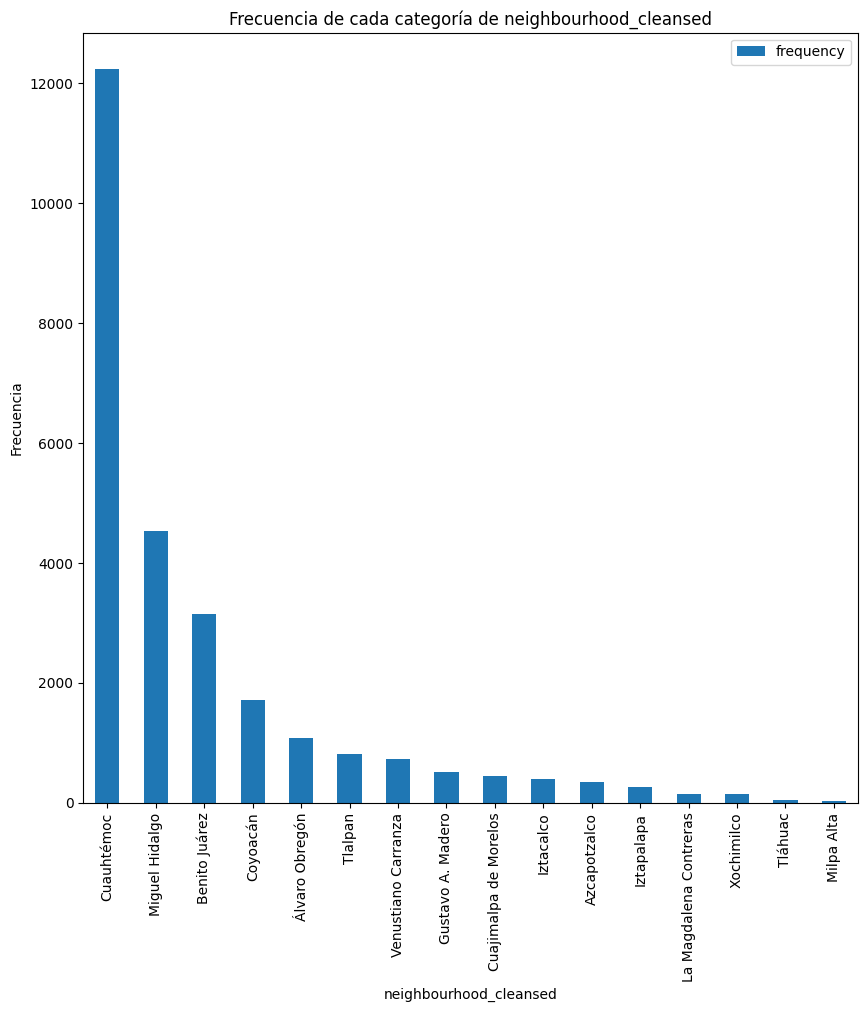

In [183]:
neighbourhood_cleansed.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de neighbourhood_cleansed")
plt.ylabel("Frecuencia")

#### Variable "property_type"

In [184]:
property_type = fp.freq_tbl(df["property_type"])
property_type.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
property_type

,property_type,frequency
0,Entire rental unit,9971
1,Entire condo,3423
2,Private room in rental unit,3034
3,Private room in home,2266
4,Entire loft,1515
...,...,...
87,Private room in floor,1
88,Earthen home,1
89,Entire in-law,1
90,Shared room in dorm,1


In [185]:
# Ajustamos el índice
property_type = property_type.set_index("property_type")
# Debido a la gran cantidad de categorías, solo mostraremos las 5 primeras
property_type = property_type.head(5)
property_type

,frequency
property_type,
Entire rental unit,9971
Entire condo,3423
Private room in rental unit,3034
Private room in home,2266
Entire loft,1515


Text(0, 0.5, 'Frecuencia')

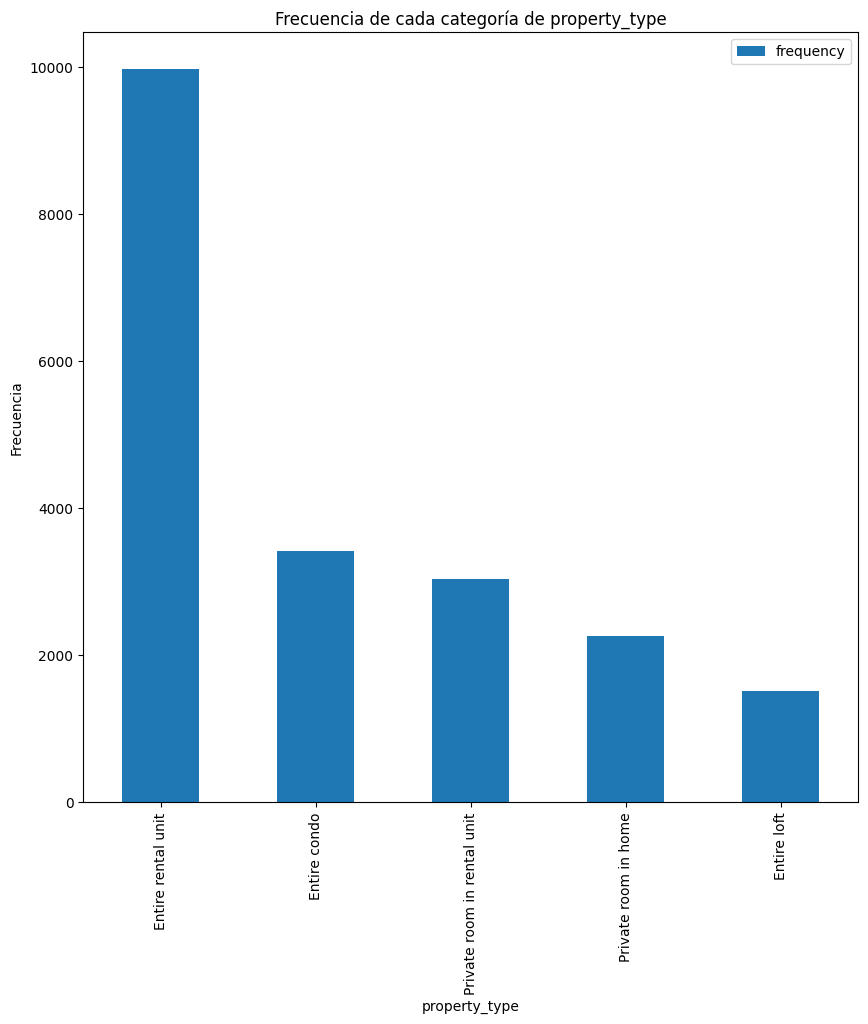

In [186]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
property_type.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de property_type")
plt.ylabel("Frecuencia")

#### Variable "room_type"

In [187]:
room_type = fp.freq_tbl(df["room_type"])
room_type.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
room_type

,room_type,frequency
0,Entire home/apt,17362
1,Private room,8693
2,Shared room,401
3,Hotel room,125


In [188]:
# Ajustamos el índice
room_type = room_type.set_index("room_type")
room_type

,frequency
room_type,
Entire home/apt,17362
Private room,8693
Shared room,401
Hotel room,125


Text(0, 0.5, '')

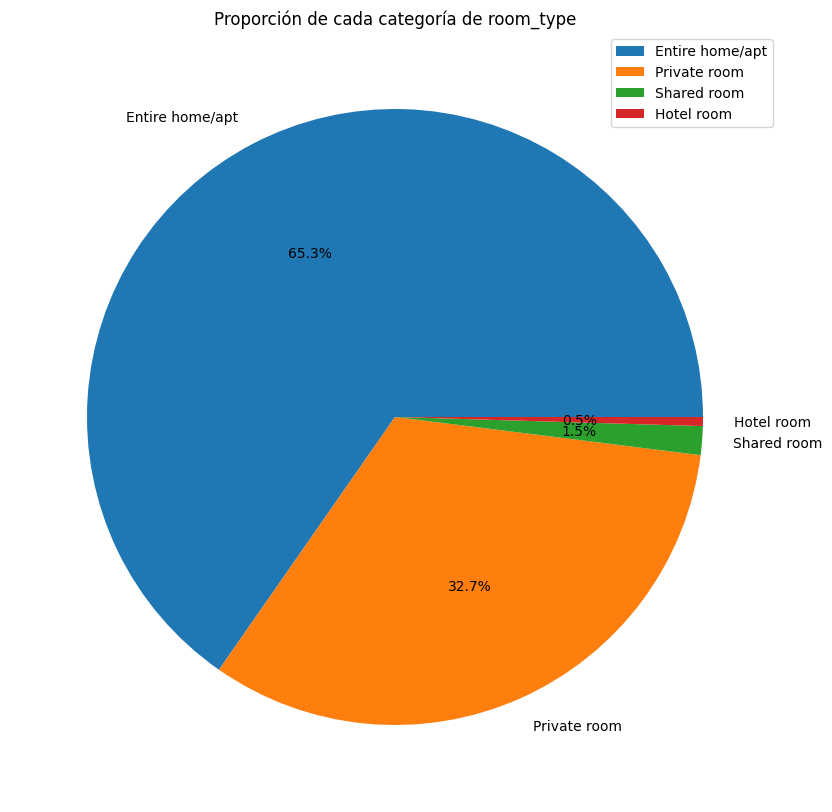

In [189]:
# Haremos un gráfico de pastel para representar la proporción de cada categoría
room_type.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de room_type")
plt.ylabel("")

#### Variable "bathrooms_text"

In [190]:
df["bathrooms_text"].value_counts()

bathrooms_text
1 bath               11326
2 baths               4606
1 private bath        3144
1 shared bath         2482
1.5 baths             1432
2.5 baths              854
3 baths                546
1.5 shared baths       459
2 shared baths         320
3.5 baths              250
4 baths                186
2.5 shared baths       121
3 shared baths         105
4.5 baths              102
4 shared baths          68
0 baths                 54
5 shared baths          54
5 baths                 51
0 shared baths          45
6 baths                 44
Half-bath               41
5.5 baths               38
3.5 shared baths        33
7 baths                 25
Shared half-bath        21
4.5 shared baths        20
6 shared baths          19
8 baths                 18
11.5 baths              17
6.5 baths               14
8 shared baths          12
Private half-bath       10
7.5 baths               10
9 baths                  8
8.5 baths                7
10 baths                 5
11 baths     

In [191]:
# Haremos el análisis univariado de la variable "bathrooms_text"
bathrooms_text = fp.freq_tbl(df["bathrooms_text"])
# Eliminaremos el primer número y solo dejaremos la categoría (por ejemplo, "1.0 baths" -> "baths")
# Ignoraremos los errores por problemas de formato
bathrooms_text["bathrooms_text"] = bathrooms_text["bathrooms_text"].apply(lambda x: x.split(" ")[1] if len(x.split(" ")) > 1 else x)
bathrooms_text = fp.freq_tbl(bathrooms_text["bathrooms_text"])
bathrooms_text.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
bathrooms_text

,bathrooms_text,frequency
0,baths,36
1,shared,17
2,half-bath,2
3,bath,1
4,private,1
5,Half-bath,1


In [192]:
# Ajustamos el índice
bathrooms_text = bathrooms_text.set_index("bathrooms_text")
# Quitamos los valores de un único valor
bathrooms_text = bathrooms_text[bathrooms_text["frequency"] > 1]
bathrooms_text

,frequency
bathrooms_text,
baths,36
shared,17
half-bath,2


Text(0, 0.5, '')

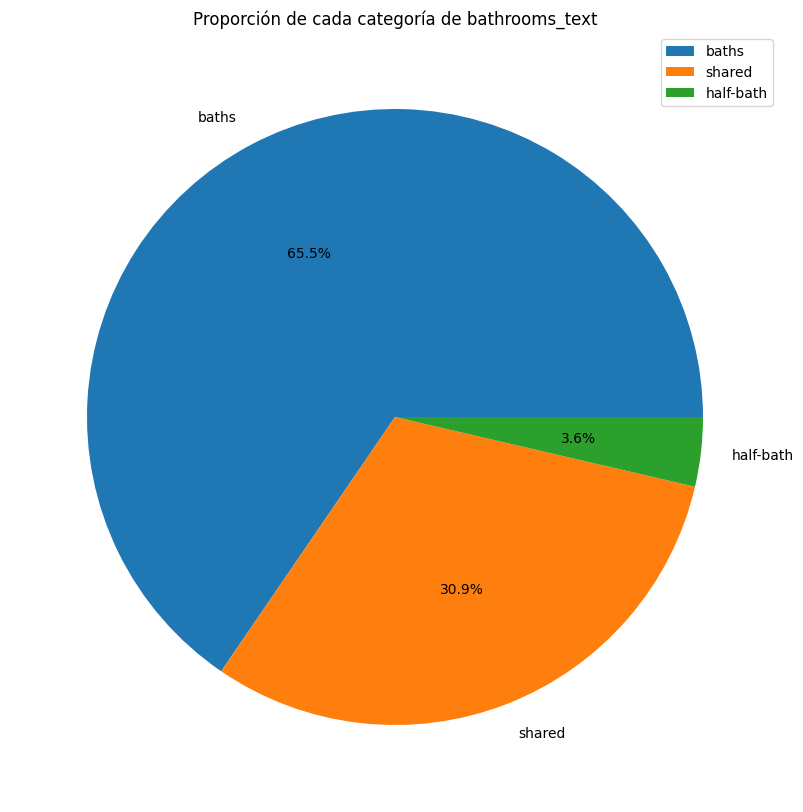

In [193]:
# Haremos un gráfico de pastel para representar la proporción de cada categoría
bathrooms_text.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de bathrooms_text")
plt.ylabel("")

#### Variable "has_availability"

In [194]:
has_availability = fp.freq_tbl(df["has_availability"])
has_availability.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
has_availability

,has_availability,frequency
0,t,25532
1,f,1049


In [195]:
# Ajustamos el índice
has_availability = has_availability.set_index("has_availability")
has_availability

,frequency
has_availability,
t,25532
f,1049


Text(0, 0.5, '')

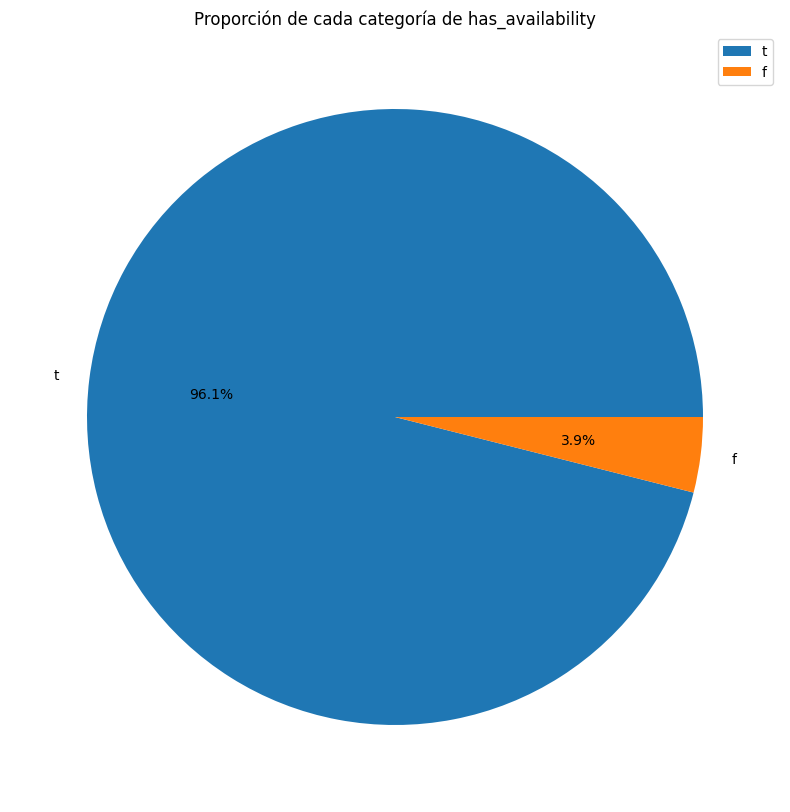

In [196]:
has_availability.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de has_availability")
plt.ylabel("")

#### Variable "instant_bookable"

In [197]:
instant_bookable = fp.freq_tbl(df["instant_bookable"])
instant_bookable.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
instant_bookable

,instant_bookable,frequency
0,f,16079
1,t,10502


In [198]:
instant_bookable = instant_bookable.set_index("instant_bookable")
instant_bookable

,frequency
instant_bookable,
f,16079
t,10502


Text(0, 0.5, '')

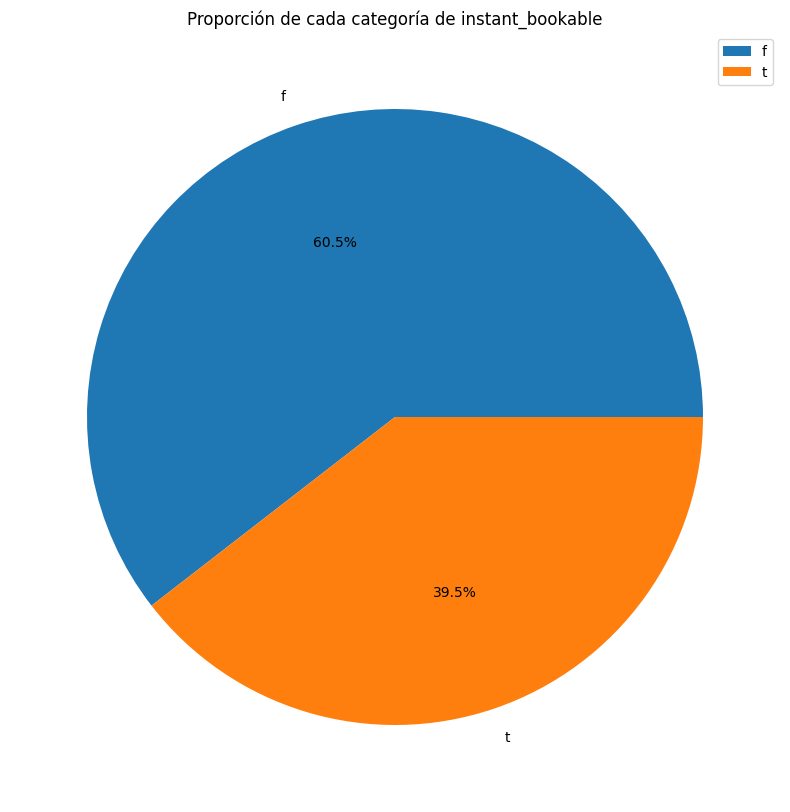

In [199]:
instant_bookable.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de instant_bookable")
plt.ylabel("")

#### Variable "host_location"

In [200]:
host_location = fp.freq_tbl(df["host_location"])
host_location.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_location

,host_location,frequency
0,"Mexico City, Mexico",17197
1,No host_location,5441
2,Mexico,949
3,"Ciudad de México, Mexico",383
4,"Federal District, Mexico",213
...,...,...
396,"Merion Station, PA",1
397,"Colima, Mexico",1
398,Singapore,1
399,"Mahahual, Mexico",1


In [201]:
host_location = host_location.set_index("host_location")
# Debido a la gran cantidad de categorías, solo mostraremos las 5 primeras
host_location = host_location.head(5)
host_location

,frequency
host_location,
"Mexico City, Mexico",17197
No host_location,5441
Mexico,949
"Ciudad de México, Mexico",383
"Federal District, Mexico",213


Text(0, 0.5, 'Frecuencia')

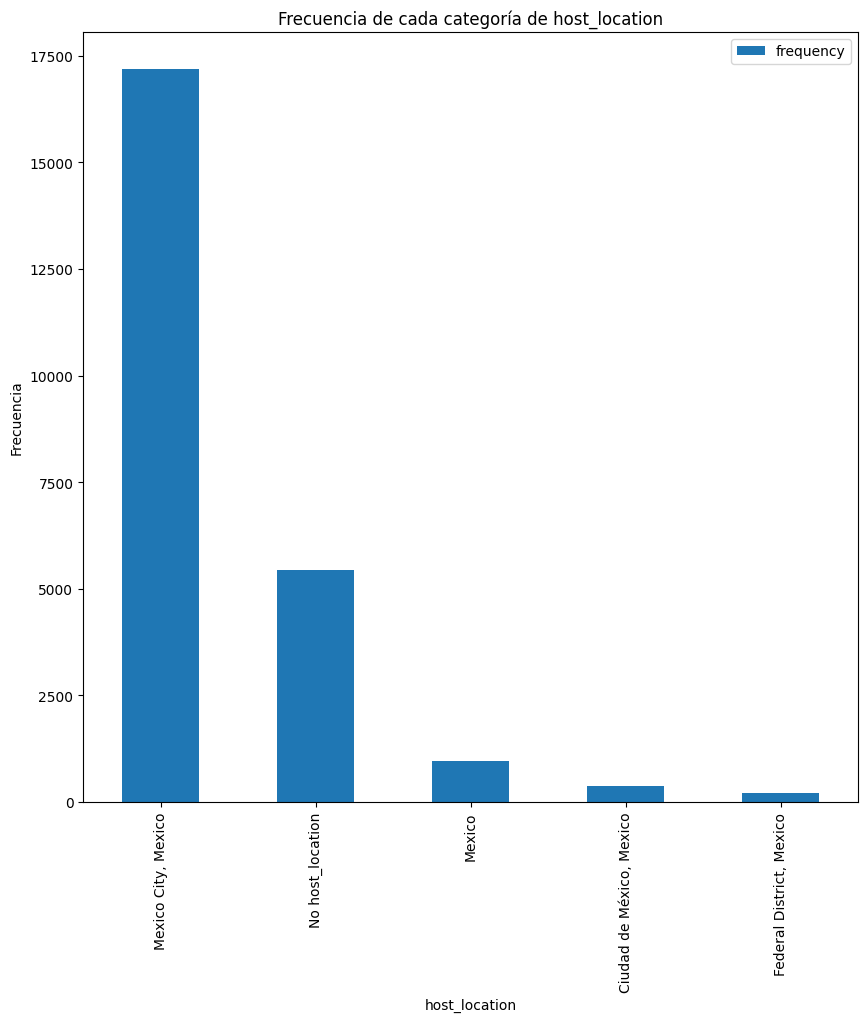

In [202]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
host_location.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de host_location")
plt.ylabel("Frecuencia")

#### Variable "host_verifications"

In [203]:
host_verifications = fp.freq_tbl(df["host_verifications"])
host_verifications.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_verifications

,host_verifications,frequency
0,"['email', 'phone']",20504
1,"['email', 'phone', 'work_email']",3380
2,['phone'],2527
3,"['phone', 'work_email']",105
4,['email'],33
5,[],30
6,"['email', 'work_email']",1
7,['work_email'],1


In [204]:
host_verifications = host_verifications.set_index("host_verifications")
host_verifications

,frequency
host_verifications,
"['email', 'phone']",20504
"['email', 'phone', 'work_email']",3380
['phone'],2527
"['phone', 'work_email']",105
['email'],33
[],30
"['email', 'work_email']",1
['work_email'],1


Text(0, 0.5, 'Frecuencia')

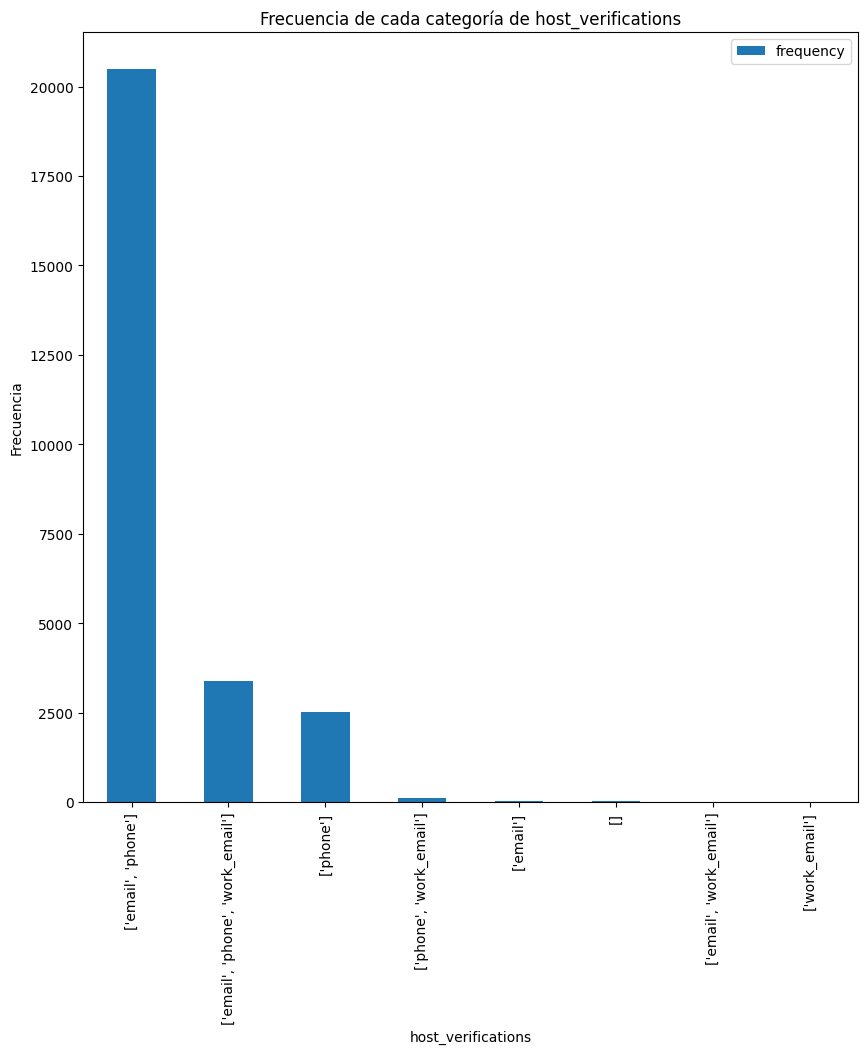

In [205]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
host_verifications.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de host_verifications")
plt.ylabel("Frecuencia")

#### Categorización de Variables

In [206]:
df2 = pd.read_csv('listings - CDMX_clean.csv')
df2.isnull().sum().sum()

0

#### Variable "host_response_rate"

In [207]:
# Procesamiento requerido para convertir la variable "host_response_rate" en numérica
df2["host_response_rate"] = df2["host_response_rate"].apply(lambda x: x[:-1] if type(x) == str else x)
df2["host_response_rate"] = pd.to_numeric(df2["host_response_rate"], errors='coerce')
df2["host_response_rate"] = df2["host_response_rate"].fillna(0)

In [208]:
# Determinación de la cantidad de clases a crear

# Calculamos el numero total de la poblacion "n"
n = df2["host_response_rate"].count()
# Obtenemos el limite inferior y superior del intervalo de clase
Max=df2["host_response_rate"].max()
Min=df2["host_response_rate"].min()
Limites = [Min, Max]
# Calculamos el rango r
R = Max - Min
# Calculamos el número de intervalos de clase "ni", aplocando la regla de Sturges
ni = 1+3.32*np.log10(n)
# Calculamos el ancho del intervalo "i"
i = R/ni

print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  6.373658224393276


In [209]:
# Creación de las intervalos y clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["host_response_rate"] = pd.cut(df2["host_response_rate"], bins=intervalos, labels=categorias, include_lowest=True)
df2["host_response_rate"]

0        Clase 15
1        Clase 11
2        Clase 15
3        Clase 15
4         Clase 1
           ...   
26576    Clase 15
26577    Clase 15
26578    Clase 15
26579    Clase 15
26580    Clase 15
Name: host_response_rate, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']

#### Variable "host_acceptance_rate"

In [210]:
# Procesamiento requerido para convertir la variable "host_response_rate" en numérica
df2["host_acceptance_rate"] = df2["host_acceptance_rate"].apply(lambda x: x[:-1] if type(x) == str else x)
df2["host_acceptance_rate"] = pd.to_numeric(df2["host_acceptance_rate"], errors='coerce')
df2["host_acceptance_rate"] = df2["host_acceptance_rate"].fillna(0)

In [211]:
# Determinación de la cantidad de clases a crear
n = df2["host_acceptance_rate"].count()
Max=df2["host_acceptance_rate"].max()
Min=df2["host_acceptance_rate"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  6.373658224393276


In [212]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["host_acceptance_rate"] = pd.cut(df2["host_acceptance_rate"], bins=intervalos, labels=categorias, include_lowest=True)
df2["host_acceptance_rate"]

0        Clase 14
1         Clase 9
2        Clase 15
3        Clase 15
4         Clase 1
           ...   
26576    Clase 15
26577    Clase 15
26578    Clase 15
26579    Clase 15
26580    Clase 15
Name: host_acceptance_rate, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']

#### Variable "host_total_listings_count"

In [213]:
# Determinación de la cantidad de clases a crear
n = df2["host_total_listings_count"].count()
Max=df2["host_total_listings_count"].max()
Min=df2["host_total_listings_count"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  2.421990125269445


In [214]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["host_total_listings_count"] = pd.cut(df2["host_total_listings_count"], bins=intervalos, labels=categorias, include_lowest=True)
df2["host_total_listings_count"]

0        Clase 5
1        Clase 2
2        Clase 2
3        Clase 3
4        Clase 2
          ...   
26576    Clase 3
26577    Clase 6
26578    Clase 6
26579    Clase 6
26580    Clase 2
Name: host_total_listings_count, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']

#### Variable "accommodates"

In [215]:
# Determinación de la cantidad de clases a crear
n = df2["accommodates"].count()
Max=df2["accommodates"].max()
Min=df2["accommodates"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  0.38241949346359655


In [216]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["accommodates"] = pd.cut(df2["accommodates"], bins=intervalos, labels=categorias, include_lowest=True)
df2["accommodates"]

0        Clase 5
1        Clase 8
2        Clase 3
3        Clase 3
4        Clase 3
          ...   
26576    Clase 8
26577    Clase 3
26578    Clase 3
26579    Clase 3
26580    Clase 3
Name: accommodates, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']

#### Variable "bathrooms_text"

In [217]:
# procesamiento requerido para convertir la variable "bathrooms_text" en numérica
df2["bathrooms_text"] = df2["bathrooms_text"].apply(lambda x: x.split(" ")[0] if type(x) == str else x)
df2["bathrooms_text"] = pd.to_numeric(df2["bathrooms_text"], errors='coerce')
df2["bathrooms_text"] = df2["bathrooms_text"].fillna(0)
df2["bathrooms_text"].isnull().sum()

0

In [218]:
# Determinación de la cantidad de clases a crear
n = df2["bathrooms_text"].count()
Max=df2["bathrooms_text"].max()
Min=df2["bathrooms_text"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  3.1230925299527055


In [219]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["bathrooms_text"] = pd.cut(df2["bathrooms_text"], bins=intervalos, labels=categorias, include_lowest=True)
df2["bathrooms_text"]

0        Clase 2
1        Clase 1
2        Clase 1
3        Clase 1
4        Clase 1
          ...   
26576    Clase 1
26577    Clase 1
26578    Clase 1
26579    Clase 1
26580    Clase 1
Name: bathrooms_text, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']

#### Variable "beds"

In [220]:
# Determinación de la cantidad de clases a crear
n = df2["beds"].count()
Max=df2["beds"].max()
Min=df2["beds"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  0.19120974673179827


In [221]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["beds"] = pd.cut(df2["beds"], bins=intervalos, labels=categorias, include_lowest=True)
df2["beds"]

0         Clase 5
1        Clase 10
2         Clase 5
3         Clase 5
4         Clase 5
           ...   
26576    Clase 10
26577     Clase 5
26578     Clase 5
26579     Clase 5
26580     Clase 5
Name: beds, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']

#### Variable "price"

In [222]:
# Determinación de la cantidad de clases a crear
n = df2["price"].count()
Max=df2["price"].max()
Min=df2["price"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  188.9152297710167


In [223]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["price"] = pd.cut(df2["price"], bins=intervalos, labels=categorias, include_lowest=True)
df2["price"]

0        Clase 15
1        Clase 11
2         Clase 6
3         Clase 6
4         Clase 6
           ...   
26576     Clase 3
26577    Clase 15
26578    Clase 14
26579    Clase 14
26580     Clase 7
Name: price, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']

#### Variable "number_of_reviews_ltm"

In [224]:
# Determinación de la cantidad de clases a crear
n = df2["number_of_reviews_ltm"].count()
Max=df2["number_of_reviews_ltm"].max()
Min=df2["number_of_reviews_ltm"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  3.3143022766845034


In [225]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["number_of_reviews_ltm"] = pd.cut(df2["number_of_reviews_ltm"], bins=intervalos, labels=categorias, include_lowest=True)
df2["number_of_reviews_ltm"]

0        Clase 1
1        Clase 2
2        Clase 3
3        Clase 1
4        Clase 1
          ...   
26576    Clase 1
26577    Clase 1
26578    Clase 1
26579    Clase 1
26580    Clase 1
Name: number_of_reviews_ltm, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']

#### Variable "availability_365"

In [226]:
# Determinación de la cantidad de clases a crear
n = df2["availability_365"].count()
Max=df2["availability_365"].max()
Min=df2["availability_365"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  23.263852519035456


In [227]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["availability_365"] = pd.cut(df2["availability_365"], bins=intervalos, labels=categorias, include_lowest=True)
df2["availability_365"]

0        Clase 14
1        Clase 14
2        Clase 11
3        Clase 12
4         Clase 1
           ...   
26576    Clase 15
26577     Clase 8
26578     Clase 8
26579     Clase 8
26580     Clase 7
Name: availability_365, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']

#### Variable "number_of_reviews"

In [228]:
# Determinación de la cantidad de clases a crear
n = df2["number_of_reviews"].count()
Max=df2["number_of_reviews"].max()
Min=df2["number_of_reviews"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  8.604438602930923


In [229]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["number_of_reviews"] = pd.cut(df2["number_of_reviews"], bins=intervalos, labels=categorias, include_lowest=True)
df2["number_of_reviews"]

0         Clase 8
1         Clase 6
2        Clase 15
3         Clase 2
4         Clase 1
           ...   
26576     Clase 1
26577     Clase 1
26578     Clase 1
26579     Clase 1
26580     Clase 1
Name: number_of_reviews, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']

#### Variable "review_scores_location"

In [230]:
# Determinación de la cantidad de clases a crear
n = df2["review_scores_location"].count()
Max=df2["review_scores_location"].max()
Min=df2["review_scores_location"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  0.0509892657951462


In [231]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_location"] = pd.cut(df2["review_scores_location"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_location"]

0        Clase 15
1        Clase 15
2        Clase 15
3        Clase 14
4        Clase 14
           ...   
26576    Clase 14
26577    Clase 14
26578    Clase 14
26579    Clase 14
26580    Clase 14
Name: review_scores_location, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']

#### Variable "review_scores_value"

In [232]:
# Determinación de la cantidad de clases a crear
n = df2["review_scores_value"].count()
Max=df2["review_scores_value"].max()
Min=df2["review_scores_value"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  0.07011024046832605


In [233]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_value"] = pd.cut(df2["review_scores_value"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_value"]

0         Clase 8
1        Clase 14
2        Clase 14
3        Clase 13
4        Clase 13
           ...   
26576    Clase 13
26577    Clase 13
26578    Clase 13
26579    Clase 13
26580    Clase 13
Name: review_scores_value, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']

#### Variable "review_per_month"

In [234]:
# Determinación de la cantidad de clases a crear
n = df2["reviews_per_month"].count()
Max=df2["reviews_per_month"].max()
Min=df2["reviews_per_month"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  0.34481490993967623


In [235]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["reviews_per_month"] = pd.cut(df2["reviews_per_month"], bins=intervalos, labels=categorias, include_lowest=True)
df2["reviews_per_month"]

0        Clase 2
1        Clase 1
2        Clase 3
3        Clase 1
4        Clase 4
          ...   
26576    Clase 3
26577    Clase 3
26578    Clase 3
26579    Clase 3
26580    Clase 3
Name: reviews_per_month, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']

#### Variable "review_scores_communication"

In [236]:
# Determinación de la cantidad de clases a crear
n = df2["review_scores_communication"].count()
Max=df2["review_scores_communication"].max()
Min=df2["review_scores_communication"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  0.052263997440024884


In [237]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_communication"] = pd.cut(df2["review_scores_communication"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_communication"]

0        Clase 11
1        Clase 14
2        Clase 15
3        Clase 11
4        Clase 14
           ...   
26576    Clase 14
26577    Clase 14
26578    Clase 14
26579    Clase 14
26580    Clase 14
Name: review_scores_communication, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']

#### Variable "review_scores_checkin"

In [238]:
# Determinación de la cantidad de clases a crear
n = df2["review_scores_checkin"].count()
Max=df2["review_scores_checkin"].max()
Min=df2["review_scores_checkin"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  0.04780243668294957


In [239]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_checkin"] = pd.cut(df2["review_scores_checkin"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_checkin"]

0        Clase 13
1        Clase 14
2        Clase 15
3        Clase 15
4        Clase 13
           ...   
26576    Clase 13
26577    Clase 13
26578    Clase 13
26579    Clase 13
26580    Clase 13
Name: review_scores_checkin, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']

#### Variable "review_scores_cleanliness"

In [240]:
# Determinación de la cantidad de clases a crear
n = df2["review_scores_cleanliness"].count()
Max=df2["review_scores_cleanliness"].max()
Min=df2["review_scores_cleanliness"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  0.0694728746458867


In [241]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_cleanliness"] = pd.cut(df2["review_scores_cleanliness"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_cleanliness"]

0        Clase 11
1        Clase 12
2        Clase 15
3        Clase 15
4        Clase 13
           ...   
26576    Clase 13
26577    Clase 13
26578    Clase 13
26579    Clase 13
26580    Clase 13
Name: review_scores_cleanliness, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']

#### Variable "review_scores_accuracy"

In [242]:
# Determinación de la cantidad de clases a crear
n = df2["review_scores_accuracy"].count()
Max=df2["review_scores_accuracy"].max()
Min=df2["review_scores_accuracy"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  15.68957676727626
Ancho del intervalo:  0.058000289841978823


In [243]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_accuracy"] = pd.cut(df2["review_scores_accuracy"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_accuracy"]

0         Clase 8
1        Clase 12
2        Clase 14
3        Clase 15
4        Clase 12
           ...   
26576    Clase 12
26577    Clase 12
26578    Clase 12
26579    Clase 12
26580    Clase 12
Name: review_scores_accuracy, Length: 26581, dtype: category
Categories (15, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 12' < 'Clase 13' < 'Clase 14' < 'Clase 15']